In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes1.csv to diabetes1 (2).csv


In [3]:
df = pd.read_csv('./diabetes.csv')

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# splitting data into independent and dependent variables
X = df.iloc[:, 0:8]
y = df["Outcome"] 
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (768, 8)
y shape:  (768,)


In [7]:
# standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (691, 8)
X_test shape:  (77, 8)
y_train shape:  (691,)
y_test shape:  (77,)


# Adam

In [9]:
# define model
model_adam = models.Sequential()
model_adam.add(layers.Dense(100, activation="relu"))
model_adam.add(layers.Dense(50, activation="relu"))
model_adam.add(layers.Dense(25, activation="relu"))
model_adam.add(layers.Dense(12, activation="relu"))
model_adam.add(layers.Dense(1, activation="sigmoid"))

In [10]:
# adam optimizer 
model_adam.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
# train adam model
history_adam = model_adam.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 21ms/step - loss: 0.6326 - accuracy: 0.6599 - val_loss: 0.5336 - val_accuracy: 0.7922
Epoch 2/15
22/22 [==============================] - 0s 3ms/step - loss: 0.5154 - accuracy: 0.7554 - val_loss: 0.4211 - val_accuracy: 0.8312
Epoch 3/15
22/22 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.7844 - val_loss: 0.3957 - val_accuracy: 0.8182
Epoch 4/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4520 - accuracy: 0.7902 - val_loss: 0.3839 - val_accuracy: 0.8442
Epoch 5/15
22/22 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.7931 - val_loss: 0.3962 - val_accuracy: 0.8312
Epoch 6/15
22/22 [==============================] - 0s 5ms/step - loss: 0.4351 - accuracy: 0.7945 - val_loss: 0.3889 - val_accuracy: 0.8312
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4255 - accuracy: 0.8061 - val_loss: 0.3811 - val_accuracy: 0.8312
Epoch 8/15
22/22 [=

Text(0, 0.5, 'Accuracy')

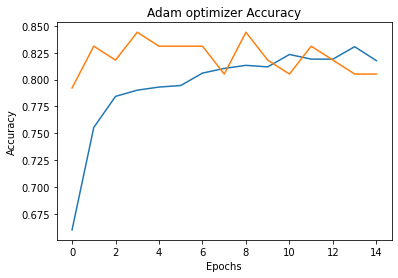

In [12]:
# plot accuracy
plt.plot(history_adam.history['accuracy'], label='accuracy')
plt.plot(history_adam.history['val_accuracy'], label='val_accuracy')
plt.title("Adam optimizer Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Adagrad

In [13]:
# define model
model_adagrad = models.Sequential()
model_adagrad.add(layers.Dense(100, activation="relu"))
model_adagrad.add(layers.Dense(50, activation="relu"))
model_adagrad.add(layers.Dense(25, activation="relu"))
model_adagrad.add(layers.Dense(12, activation="relu"))
model_adagrad.add(layers.Dense(1, activation="sigmoid"))

In [14]:
# adam optimizer 
model_adagrad.compile(optimizer="Adagrad", loss="binary_crossentropy", metrics=["accuracy"])

In [15]:
# train adagrad model
history_adagrad = model_adagrad.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 13ms/step - loss: 0.6746 - accuracy: 0.6425 - val_loss: 0.6727 - val_accuracy: 0.6364
Epoch 2/15
22/22 [==============================] - 0s 5ms/step - loss: 0.6676 - accuracy: 0.6585 - val_loss: 0.6655 - val_accuracy: 0.6623
Epoch 3/15
22/22 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.6657 - val_loss: 0.6585 - val_accuracy: 0.6753
Epoch 4/15
22/22 [==============================] - 0s 10ms/step - loss: 0.6550 - accuracy: 0.6512 - val_loss: 0.6521 - val_accuracy: 0.6623
Epoch 5/15
22/22 [==============================] - 0s 11ms/step - loss: 0.6495 - accuracy: 0.6527 - val_loss: 0.6459 - val_accuracy: 0.6623
Epoch 6/15
22/22 [==============================] - 0s 11ms/step - loss: 0.6440 - accuracy: 0.6570 - val_loss: 0.6400 - val_accuracy: 0.6623
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 0.6389 - accuracy: 0.6556 - val_loss: 0.6346 - val_accuracy: 0.6623
Epoch 8/15
22/22

Text(0, 0.5, 'Accuracy')

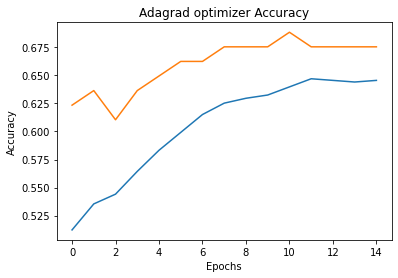

In [ ]:
# plot accuracy
plt.plot(history_adagrad.history['accuracy'], label='accuracy')
plt.plot(history_adagrad.history['val_accuracy'], label='val_accuracy')
plt.title("Adagrad optimizer Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# RMSprop

In [ ]:
# define model
model_rmsprop = models.Sequential()
model_rmsprop.add(layers.Dense(100, activation="relu"))
model_rmsprop.add(layers.Dense(50, activation="relu"))
model_rmsprop.add(layers.Dense(25, activation="relu"))
model_rmsprop.add(layers.Dense(12, activation="relu"))
model_rmsprop.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
# adam optimizer 
model_rmsprop.compile(optimizer="RMSprop", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# train rmsprop model
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 10ms/step - loss: 0.6216 - accuracy: 0.6946 - val_loss: 0.5351 - val_accuracy: 0.8182
Epoch 2/15
22/22 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7467 - val_loss: 0.4766 - val_accuracy: 0.8182
Epoch 3/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.7670 - val_loss: 0.4519 - val_accuracy: 0.8182
Epoch 4/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4697 - accuracy: 0.7656 - val_loss: 0.4403 - val_accuracy: 0.8182
Epoch 5/15
22/22 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.7959 - val_loss: 0.4343 - val_accuracy: 0.8182
Epoch 6/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.7829 - val_loss: 0.4302 - val_accuracy: 0.8312
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4416 - accuracy: 0.7800 - val_loss: 0.4329 - val_accuracy: 0.8442
Epoch 8/15
22/22 [=

Text(0, 0.5, 'Accuracy')

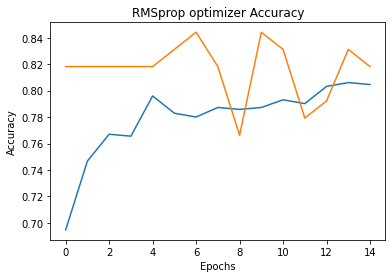

In [ ]:
# plot accuracy
plt.plot(history_rmsprop.history['accuracy'], label='accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], label='val_accuracy')
plt.title("RMSprop optimizer Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Sgd

In [ ]:
# define model
model_sgd = models.Sequential()
model_sgd.add(layers.Dense(100, activation="relu"))
model_sgd.add(layers.Dense(50, activation="relu"))
model_sgd.add(layers.Dense(25, activation="relu"))
model_sgd.add(layers.Dense(12, activation="relu"))
model_sgd.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
# adam optimizer 
model_sgd.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# train sgd model
history_sgd = model_sgd.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 11ms/step - loss: 0.6845 - accuracy: 0.6179 - val_loss: 0.6815 - val_accuracy: 0.6753
Epoch 2/15
22/22 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.6469 - val_loss: 0.6697 - val_accuracy: 0.6883
Epoch 3/15
22/22 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6483 - val_loss: 0.6599 - val_accuracy: 0.6883
Epoch 4/15
22/22 [==============================] - 0s 3ms/step - loss: 0.6576 - accuracy: 0.6483 - val_loss: 0.6515 - val_accuracy: 0.6883
Epoch 5/15
22/22 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.6483 - val_loss: 0.6441 - val_accuracy: 0.6883
Epoch 6/15
22/22 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6483 - val_loss: 0.6367 - val_accuracy: 0.6883
Epoch 7/15
22/22 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.6483 - val_loss: 0.6290 - val_accuracy: 0.6883
Epoch 8/15
22/22 [=

Text(0, 0.5, 'Accuracy')

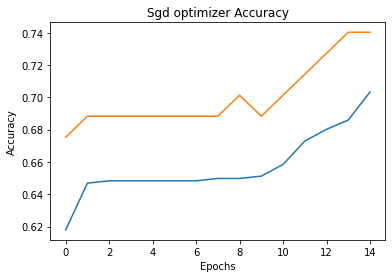

In [ ]:
# plot accuracy
plt.plot(history_sgd.history['accuracy'], label='accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='val_accuracy')
plt.title("Sgd optimizer Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")